<a href="https://colab.research.google.com/github/ljtaylor99/AAI-510-Final-Project/blob/main/AAI510_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Reading json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Click on Mount Drive to connect to Google Drive
# Navigate to json file from dataset and replace file path
df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_review.json',nrows = 2000000,lines=True)
df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


#### Basic EDA

In [4]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [5]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [6]:
df.describe(include='all')

<ipython-input-6-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000,2000000
unique,2000000,895930,45055,NaN,NaN,NaN,NaN,1996202,1991307
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,VQcCL9PiNL_wkGf-uF3fjg,NaN,NaN,NaN,NaN,DO NOT PARK HERE!\nthey are too quick to boot ...,2019-05-08 23:38:13
freq,1,894,4706,NaN,NaN,NaN,NaN,6,4
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 16:57:17
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-19 19:47:59
mean,NaN,NaN,NaN,3.766570e+00,1.145340e+00,3.195710e-01,4.794245e-01,NaN,NaN
std,NaN,NaN,NaN,1.462870e+00,2.909354e+00,1.641546e+00,1.925800e+00,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [7]:
# Value counts for different businesses
df['business_id'].value_counts()

VQcCL9PiNL_wkGf-uF3fjg    4706
GBTPC53ZrG1ZBY3DT8Mbcw    4661
_C7QiQQc47AOEv4PE3Kong    4440
qb28j-FNX1_6xm7u372TZA    3561
DcBLYSvOuWcNReolRVr12A    3217
                          ... 
0U5d1K0p0u9e_NmX7U3FUA       1
qKjOn_PJQIudpQpoolB0bw       1
dGLx7Ls5DQtlG0sLcZ0DZQ       1
6BJ4LYa42I-gBz9IhhidYg       1
AFU5ZlFCYA0_Eqw5MlqJOg       1
Name: business_id, Length: 45055, dtype: int64

In [8]:
# Value counts of stars
df['stars'].value_counts()

5    924989
4    425651
1    293571
3    200443
2    155346
Name: stars, dtype: int64

<Axes: title={'center': 'Distribution of Star Ratings'}, xlabel='Number of Stars', ylabel='Count'>

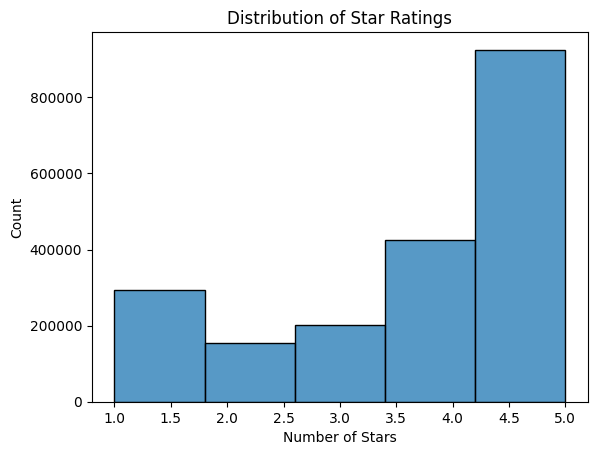

In [9]:
# Plot distribution of stars
plt.xlabel('Number of Stars')
plt.title('Distribution of Star Ratings')
sns.histplot(df['stars'],bins = 5)

## Data Prep

In [10]:
# Use reviews from one business
df_b1 = df[df['business_id']=='VQcCL9PiNL_wkGf-uF3fjg']
len(df_b1)

4706

In [11]:
# Tokenize sentences 
sentences = df_b1['text'].apply(nltk.sent_tokenize)
# Reset index
sentences.reset_index(inplace = True,drop = True)
sentences1 = []
# Combine sentences into 1 list
for r in sentences1:
  for s in r:
    sentences1.append(s)

# Print sentences for first review
sentences[0]

['We waited about five minutes to get seated for the group of five, and we were seated upstairs.',
 'Our server was really friendly and gave us a quick rundown of the menu, and we got the crawfish beignet as an appetizer from the checking on Yelp.',
 "Apparently the appetizer isn't free like the Yelp check-in says but it's -$10 for whatever appetizer you get.",
 'Anyway, we ordered a bunch of food including two platters of oysters, and we then we started waiting.',
 'And waiting.',
 'After maybe twenty minutes, our first platter of oysters came, closely followed by the second plate.',
 "We noticed the second plate wasn't what we ordered so we asked the waiter who took it back.",
 'We then waited for another twenty or thirty minutes for our food, and our entrees came.',
 'Our oysters never did.',
 'We told the waiter and he said there was a mixup and our oysters were given to the table next to us.',
 "The manager came by afterward and told us that she'd give us two orders of what we got

In [12]:
# Tokenize words

words = df_b1['text'].apply(nltk.word_tokenize)
# Reset index
words.reset_index(inplace = True,drop = True)

0       [We, waited, about, five, minutes, to, get, se...
1       [I, make, a, bee-line, to, this, place, whenev...
2       [Our, food, was, cold, our, wonderful, waitres...
3       [The, French, onion, soup, is, delicious, ., T...
4       [This, place, was, delicious, ., The, crab, fi...
                              ...                        
4701    [This, has, been, my, favorite, spot, in, New,...
4702    [Jambalaya, was, not, impressive, ,, but, char...
4703    [Terrence, was, a, great, server, for, lunch, ...
4704    [Good, food, and, attentive, service, ., Actua...
4705    [On, vacation, again, and, ofcourse, we, are, ...
Name: text, Length: 4706, dtype: object

In [13]:
# combine the lists of words into one list
words1 = []
for i in words:
  for j in i:
    words1.append(j)
  

In [14]:
word_freq = FreqDist(words1)
# Print 20 most common words
word_freq.most_common(20)

[('.', 26550),
 ('the', 18604),
 ('and', 14863),
 (',', 12575),
 ('was', 11814),
 ('a', 8825),
 ('I', 8674),
 ('to', 7591),
 ('!', 6524),
 ('of', 5675),
 ('The', 4670),
 ('it', 4550),
 ('were', 4443),
 ('in', 4372),
 ('for', 4330),
 ('we', 3819),
 ('had', 3700),
 ('but', 3221),
 ('with', 3058),
 ('We', 2983)]

In [15]:
# Remove punctuation
no_p = []
for i in words1:
  if i.isalpha():
    no_p.append(i.lower())

# Remove stopwords
stop_words = stopwords.words('english')
no_s = []
for j in no_p:
  if j not in stop_words:
    no_s.append(j)

In [16]:
# Word frequency of clean data
word_freq = FreqDist(no_s)

# Top 20 words
word_freq.most_common(20)

[('food', 3316),
 ('oysters', 3026),
 ('good', 2719),
 ('great', 2486),
 ('service', 2014),
 ('shrimp', 1758),
 ('place', 1725),
 ('new', 1468),
 ('orleans', 1354),
 ('ordered', 1303),
 ('us', 1296),
 ('would', 1265),
 ('crab', 1161),
 ('royal', 1095),
 ('got', 1076),
 ('back', 1076),
 ('time', 1076),
 ('like', 1047),
 ('came', 1037),
 ('best', 999)]

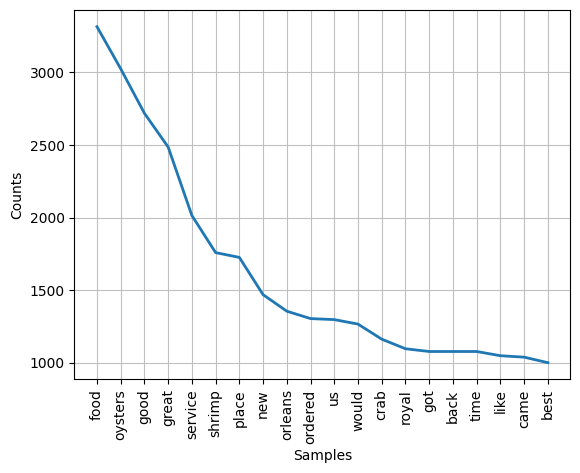

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
# Plot word frequency
word_freq.plot(20)

In [95]:
# See contexts in which common words appear
from nltk.text import Text  
corpus = Text(no_p)
corpus.concordance('service')

Displaying 25 of 2014 matches:
sitting at the bar downstairs or up service is very attentive and food is every
fter use the free appetizers coupon service was very good this place was delici
verly salty good ambience and great service we had friends recommend that we go
r great ambience and energy and the service was personalized and prompt food wa
 server tina was the best excellent service french onion soup was great the cha
 pretty fantastic as well very slow service it took us minutes just to get a wa
arted this restaurant has the worst service of any restaurant i have ever been 
d the banana foster with cheesecake service was not that great we were initiall
 you do get much of special attn on service side i think is being generous here
ou can do better in that area great service and staff food was fun ate a lot of
nd we were seated by the window the service was spectacular however we were les
 spent almost our whole night there service was just that slow would never come
first and

In [100]:
# find 4-grams
# https://stackoverflow.com/questions/42373747/is-there-a-more-efficient-way-to-find-most-common-n-grams
from collections import Counter
from nltk import ngrams

ngram_counts = Counter(ngrams(corpus, 4))
ngram_counts.most_common(20)

[(('taste', 'of', 'new', 'orleans'), 351),
 (('the', 'taste', 'of', 'new'), 240),
 (('in', 'the', 'french', 'quarter'), 188),
 (('the', 'shrimp', 'and', 'grits'), 146),
 (('one', 'of', 'the', 'best'), 92),
 (('sat', 'at', 'the', 'bar'), 90),
 (('red', 'beans', 'and', 'rice'), 81),
 (('at', 'the', 'bar', 'and'), 78),
 (('in', 'new', 'orleans', 'and'), 78),
 (('and', 'the', 'food', 'was'), 76),
 (('the', 'crab', 'claws', 'and'), 72),
 (('on', 'the', 'half', 'shell'), 72),
 (('the', 'french', 'onion', 'soup'), 66),
 (('of', 'new', 'orleans', 'and'), 65),
 (('oysters', 'on', 'the', 'half'), 65),
 (('the', 'crab', 'claw', 'appetizer'), 63),
 (('shrimp', 'and', 'grits', 'and'), 60),
 (('the', 'crab', 'claws', 'were'), 59),
 (('at', 'the', 'royal', 'house'), 57),
 (('the', 'service', 'was', 'great'), 56)]

## Sentiment Analysis 